## Import packages

In [ ]:
import pandas as pd
import numpy as np
from numpy import nan as NA
import numpy.random as random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# inline plot
%matplotlib inline

# seaborn style
sns.set_style('ticks')

In [ ]:
np.random.seed(30)
random_state = 30

## Read data

In [ ]:
df_churn = pd.read_csv('churn_dataset.csv')

## Understanding data

In [ ]:
df_churn.dtypes

phone              object
churn              object
account_length      int64
area_code           int64
custserv_calls      int64
day_calls           int64
day_charge        float64
day_mins          float64
eve_calls           int64
eve_charge        float64
eve_mins          float64
intl_calls          int64
intl_charge       float64
intl_mins         float64
intl_plan          object
night_calls         int64
night_charge      float64
night_mins        float64
vmail_message       int64
vmail_plan         object
dtype: object

<div class='alert alert-warning'>column "phone" (i.e., stores customers' phone numbers) is best treated as an ID column. It's an "object"-type (text) column, and its values are unique for each customer (p.s. two customers having the same phone number is considered a critical operational failure!)</div>

In [ ]:
df_churn['area_code'] = df_churn['area_code'].astype('category')
# re-print data-types
df_churn.dtypes

phone               object
churn               object
account_length       int64
area_code         category
custserv_calls       int64
day_calls            int64
day_charge         float64
day_mins           float64
eve_calls            int64
eve_charge         float64
eve_mins           float64
intl_calls           int64
intl_charge        float64
intl_mins          float64
intl_plan           object
night_calls          int64
night_charge       float64
night_mins         float64
vmail_message        int64
vmail_plan          object
dtype: object

## Preprocessing data

In [ ]:
df_churn1 = df_churn.copy()

# Note the following columns are to be transformed:
# "churn", "vmail_plan"
# they have these possible values: "yes" / "no"

# Version 1 below creates integer columns (below two lines are commented out)
#df_churn1['churn'] = df_churn1['churn'] == 'yes'
#df_churn1['vmail_plan'] = df_churn1['vmail_plan'] == 'yes'

# Version 2 below creates float columns
df_churn1['churn'] = (df_churn1['churn'] == 'yes').astype(float)
df_churn1['vmail_plan'] = (df_churn1['vmail_plan'] == 'yes').astype(float)

**sanity check**: verify transform successful

In [ ]:
display(df_churn1.dtypes[['churn','vmail_plan']])
print('='*40)
print('Original values look like:')
display(df_churn[['churn','vmail_plan']].head(3))
print('-'*30)
print('Transformed values look like:')
display(df_churn1[['churn','vmail_plan']].head(3))

churn         float64
vmail_plan    float64
dtype: object

Original values look like:


,churn,vmail_plan
0,no,yes
1,no,yes
2,no,no


------------------------------
Transformed values look like:


,churn,vmail_plan
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0


In [10]:
# sanity check data-types
df_churn1.dtypes

phone               object
churn              float64
account_length       int64
area_code         category
custserv_calls       int64
day_calls            int64
day_charge         float64
day_mins           float64
eve_calls            int64
eve_charge         float64
eve_mins           float64
intl_calls           int64
intl_charge        float64
intl_mins          float64
intl_plan           object
night_calls          int64
night_charge       float64
night_mins         float64
vmail_message        int64
vmail_plan         float64
dtype: object

#### Transform the `day_mins` column using Z-score standardization

In [11]:
#transform columns using z-score
scaler = StandardScaler()
df_churn1['dat_mins'] = scaler.fit_transform(df_churn1[['day_mins']])

print(df_churn1['dat_mins'])

0       1.566767
1      -0.333738
2       1.168304
3       2.196596
4      -0.240090
          ...   
3328   -0.432895
3329    0.942447
3330    0.018820
3331    0.624778
3332    1.003042
Name: dat_mins, Length: 3333, dtype: float64


Transform the `night_mins` column using Z-score standardization, and replace the values in column `night_mins` of `df_churn1` with the z-standardized values. Then used package `matplotlib` to make a histogram plot of the _standardized_ variable.

In [12]:
scaler = StandardScaler()
df_churn1['night_mins'] = scaler.fit_transform(df_churn1[['night_mins']])

print(df_churn1['night_mins'])

0       0.866743
1       1.058571
2      -0.756869
3      -0.078551
4      -0.276311
          ...   
3328    1.547039
3329   -0.189297
3330   -0.177431
3331   -1.219628
3332    0.801482
Name: night_mins, Length: 3333, dtype: float64


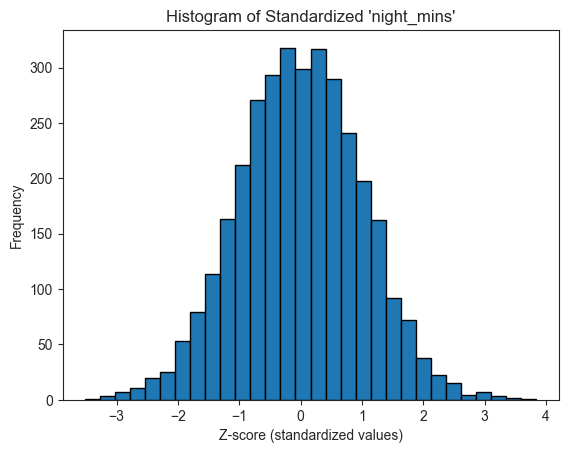

In [14]:
# Histogram of standardized night_mins
plt.hist(df_churn1['night_mins'], bins=30, edgecolor='black')
plt.title("Histogram of Standardized 'night_mins'")
plt.xlabel("Z-score (standardized values)")
plt.ylabel("Frequency")
plt.show()

Graph interpretation: the varible 'night_mins' is normally distributed, data does not appear to be highly skewed that sits in a range 0f -3.5 to +3.5 with a mean of 0.

#### Transform the `intl_calls` column using Min-Max normalization ("range-standardization"), and replace the values in column `intl_calls` of `df_churn1` with the transformed values. Then make a histogram plot of the _standardized_ variable.

In [115]:
minmax_scaler = MinMaxScaler()

# Min-Max normalize 'intl_calls' and replace in dataframe
df_churn1['intl_calls'] = minmax_scaler.fit_transform(df_churn1[['intl_calls']])

print(df_churn1['intl_calls'])

0       0.15
1       0.15
2       0.25
3       0.35
4       0.15
        ... 
3328    0.30
3329    0.20
3330    0.30
3331    0.50
3332    0.20
Name: intl_calls, Length: 3333, dtype: float64


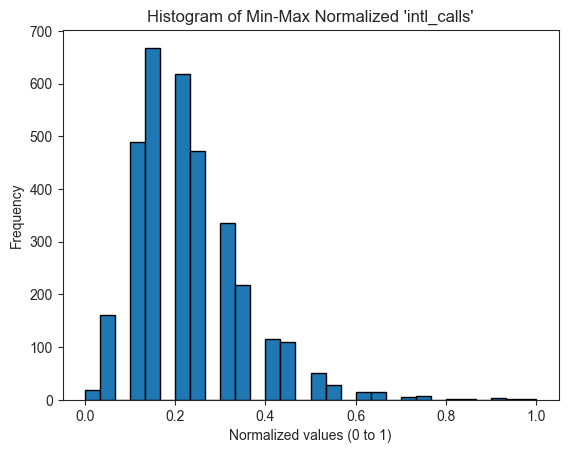

In [116]:
# Histogram of Min-Max normalized intl_calls
plt.hist(df_churn1['intl_calls'], bins=30, edgecolor='black')
plt.title("Histogram of Min-Max Normalized 'intl_calls'")
plt.xlabel("Normalized values (0 to 1)")
plt.ylabel("Frequency")
plt.show()


Graph interpretation: This distribution of this graph is right-skewed, showing that intl_calls is not normally distributed. For right-skewed data, the mean is greater than the median, and thus the skewness will be positive.

Min-max normalization values will range from 0 to 1, and we can see that there is a larger frequency of values closer to 0 (median closer to 0).

#### Create and add the flag vars to the main dataset. Used dataframe `df_churn1` when creating flag vars; creating a new dataframe `df_churn2` when merging the datasets



In [17]:
n_labels = df_churn1['area_code'].nunique()
labels =np.sort(df_churn['area_code'].unique())

print(f'there are {n_labels} discrete labels in "area_code"; they are: {labels}')

print(f'thus, {n_labels -1} flags are needs')


there are 3 discrete labels in "area_code"; they are: [408 415 510]
thus, 2 flags are needs


In [18]:
# Create dummy variables for 'area_code'
flag_area_code = pd.get_dummies(df_churn1[['area_code']], prefix='area_code', drop_first=True).astype(int)

print(flag_area_code.head())

   area_code_415  area_code_510
0              1              0
1              1              0
2              1              0
3              0              0
4              1              0


In [19]:
# Merge with original dataframe
df_churn2 = pd.concat([df_churn1.drop('area_code', axis=1), flag_area_code], axis=1)

print(df_churn2.head())

      phone  churn  account_length  custserv_calls  day_calls  day_charge  \
0  382-4657    0.0             128               1        110       45.07   
1  371-7191    0.0             107               1        123       27.47   
2  358-1921    0.0             137               0        114       41.38   
3  375-9999    0.0              84               2         71       50.90   
4  330-6626    0.0              75               3        113       28.34   

   day_mins  eve_calls  eve_charge  eve_mins  ...  intl_mins  intl_plan  \
0     265.1         99       16.78     197.4  ...       10.0         no   
1     161.6        103       16.62     195.5  ...       13.7         no   
2     243.4        110       10.30     121.2  ...       12.2         no   
3     299.4         88        5.26      61.9  ...        6.6        yes   
4     166.7        122       12.61     148.3  ...       10.1        yes   

   night_calls night_charge  night_mins  vmail_message  vmail_plan  dat_mins  \
0     

## Exploratory Data Analysis (EDA)



### *quickly detect collinear input vars using elegant visualization*

In [120]:
df_churn1['intl_plan'] = df_churn1['intl_plan'].map({'yes': 1, 'no': 0})

print(df_churn1['intl_plan'])

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: intl_plan, Length: 3333, dtype: int64


<Axes: >

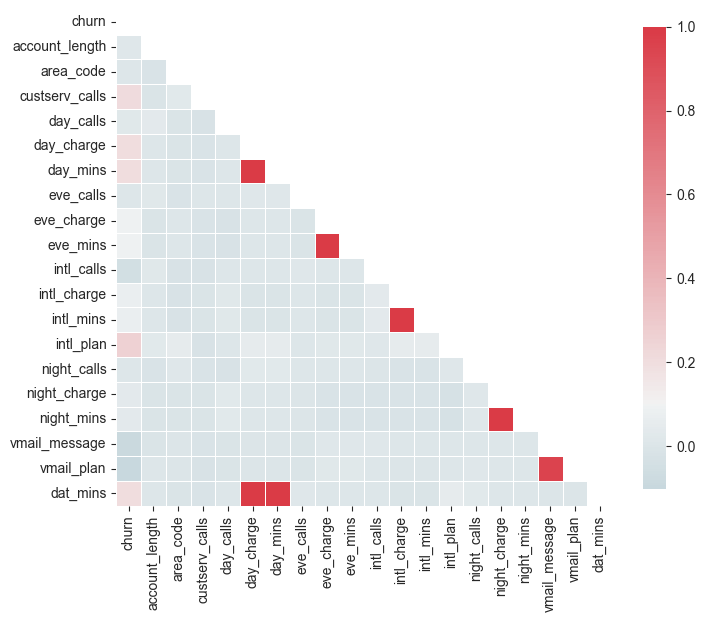

In [ ]:
# get the correlation matrix for visualization and for a closer look later
corr = df_churn1.drop(labels=['phone'], axis=1).corr()

# prepare tools for making a half-matrix correlation heatmap
mask = np.triu(np.ones_like(corr, bool))
f, ax = plt.subplots(1,1, figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.1, square=True, ax=ax, 
            linewidths=.5, cbar_kws={'shrink': .75})

In [122]:
# Run this cell. Do not change anything!
collinear_results = pd.Series(
    {'day_mins_charge': corr.loc['day_mins','day_charge'],
     'eve_mins_charge': corr.loc['eve_mins','eve_charge'],
     'intl_mins_charge': corr.loc['intl_mins','intl_charge'],
     'night_mins_charge': corr.loc['night_mins','night_charge'],
     'vmail_plan_msg': corr.loc['vmail_plan','vmail_message'],}
)
print('Possible collinear results are:')
display(collinear_results.round(3))

Possible collinear results are:


day_mins_charge      1.000
eve_mins_charge      1.000
intl_mins_charge     1.000
night_mins_charge    1.000
vmail_plan_msg       0.957
dtype: float64

<div class='alert alert-info'>

- For the first four pairs of vars (perfectly correlated), one should retain only one in each pair; the "_mins" vars are perhaps easier to interpret;

- For the last pair of vars, correlation is nearly max but not quite yet (0.957); one may retain both vars, and later use other analysis to compare their relative importance.</div>


#### Used package `seaborn` to make a panel of four scatterplots (2 by 2 layout, two subplots in 1st row and two in 2nd row). Plot `day_mins` on the x-axis of all subplots and share x across all. Used `day_charge` and `eve_mins`, respectively, on the y-axis of the upper subplots; use `night_mins` and `intl_mins`, respectively, on the y-axis of the lower subplots. In each scatterplot, used different colors for subsets with `churn` values 0 and 1. Used dataframe `df_churn1`

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


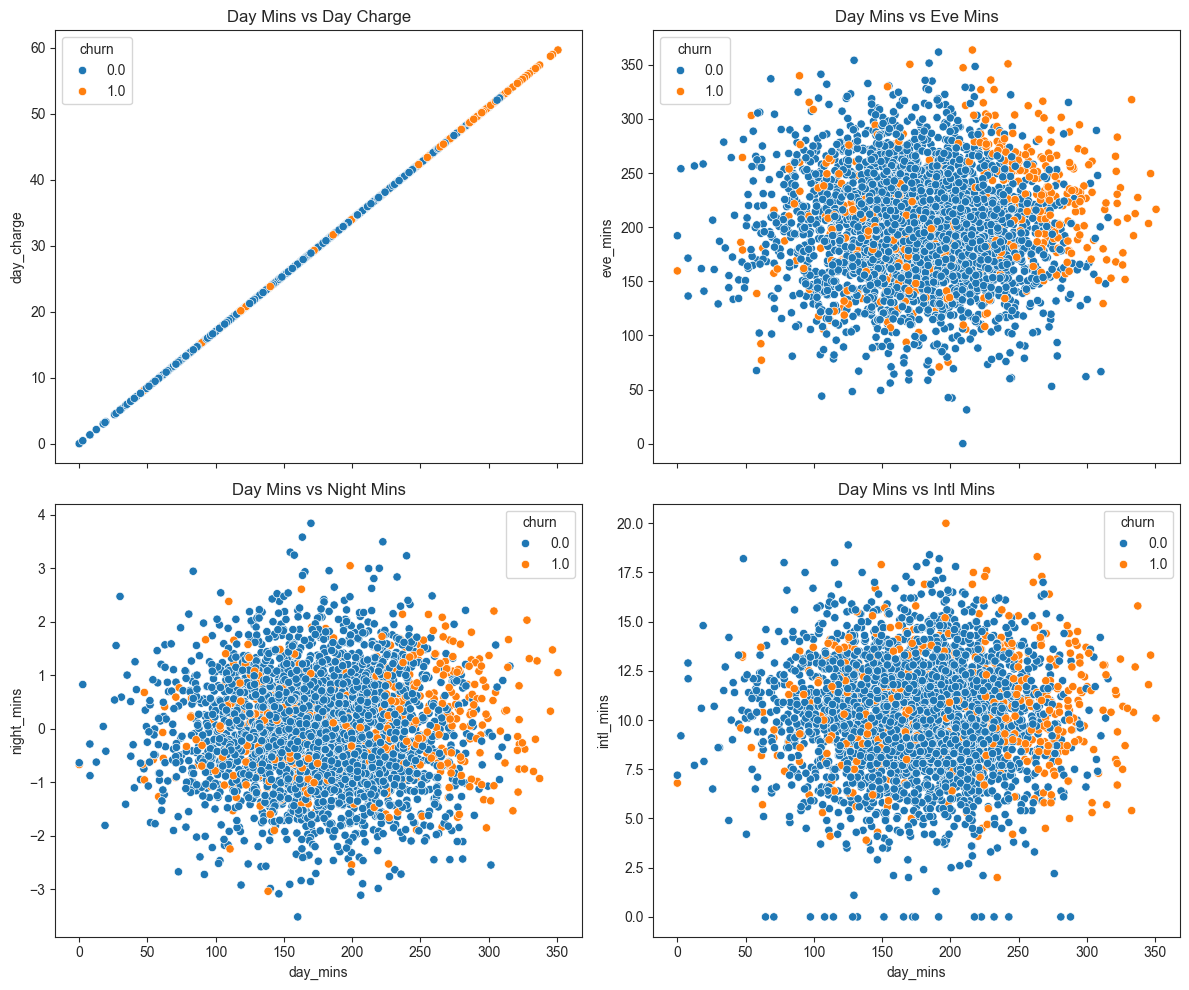

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Upper row
sns.scatterplot(data=df_churn1, x='day_mins', y='day_charge', hue='churn', ax=axes[0, 0])
axes[0, 0].set_title("Day Mins vs Day Charge")

sns.scatterplot(data=df_churn1, x='day_mins', y='eve_mins', hue='churn', ax=axes[0, 1])
axes[0, 1].set_title("Day Mins vs Eve Mins")

# Lower row
sns.scatterplot(data=df_churn1, x='day_mins', y='night_mins', hue='churn', ax=axes[1, 0])
axes[1, 0].set_title("Day Mins vs Night Mins")

sns.scatterplot(data=df_churn1, x='day_mins', y='intl_mins', hue='churn', ax=axes[1, 1])
axes[1, 1].set_title("Day Mins vs Intl Mins")

plt.tight_layout()
plt.show()

    correlation between "day_charge" and "day_mins": 1
    correlation between "eve_mins" and "day_mins": 0
    correlation between "night_mins" and "day_mins": 0
    correlation between "intl_mins" and "day_mins": 0

In [126]:
corr_day_charge = df_churn1['day_mins'].corr(df_churn1['day_charge'])
corr_day_eve   = df_churn1['day_mins'].corr(df_churn1['eve_mins'])
corr_day_night = df_churn1['day_mins'].corr(df_churn1['night_mins'])
corr_day_intl  = df_churn1['day_mins'].corr(df_churn1['intl_mins'])

print("Correlation (day_mins, day_charge):", corr_day_charge)
print("Correlation (day_mins, eve_mins):", corr_day_eve)
print("Correlation (day_mins, night_mins):", corr_day_night)
print("Correlation (day_mins, intl_mins):", corr_day_intl)

Correlation (day_mins, day_charge): 0.9999999521904
Correlation (day_mins, eve_mins): 0.007042510993777688
Correlation (day_mins, night_mins): 0.004323366578518019
Correlation (day_mins, intl_mins): -0.010154585571599492


#### Performed a train-test split using the original dataset `df_churn` and set test_size of 0.4. Assigned sets to `df_train` and `df_test`. Then conducted a t-test for equal mean on variable "eve_calls": begin by stating the null hypothesis, then stated the value of $\alpha$ (alpha), conducted the t-test, printed results

In [44]:
df_train, df_test = train_test_split(df_churn, test_size=0.4, random_state=30, shuffle = True)

     Answer: Null hypothesis - the mean value for the number of evening calls is the same in the training and testing set. Alpha = 0.05

In [45]:
train_eve_calls = df_train['eve_calls']
test_eve_calls = df_test['eve_calls']
t_stat = ttest_ind(train_eve_calls, test_eve_calls)

print('Results: t-test = {0:5.3f}, p-value = {1:5.3f}'.format(t_stat[0], t_stat[1]))

Results: t-test = 1.311, p-value = 0.190


    Answer: p-value > alpha, we fail to reject the null hypothesis. The mean for the numer of evening calls is the same in the training and test set.

#### Used the train and test sets from the previous question. Then conducted a z-test for equal proportions on variable "vmail_plan": began by stating the null hypothesis, then stated the value of $\alpha$ (alpha), conducted the test,and print results.

     Answer: Null hypothesis - the mean value for the number of vmail plan is the same in the training and testing set. Alpha = 0.05

In [47]:
count1 = df_train['vmail_plan'].value_counts()['no']
nobs1  = df_train.shape[0]

count2 = df_test['vmail_plan'].value_counts()['no']
nobs2  = df_test.shape[0]

z_stat, p_value = proportions_ztest(count=[count1, count2], nobs=[nobs1, nobs2])



print(f"Results: z-test = {z_stat:5.3f}, p-value = {p_value:5.3f}")

Results: z-test = -0.397, p-value = 0.691


    Answer: p-value > alpha, we fail to reject the null hypothesis. The mean for the numer of vmail plans is the same in the training and test set.